# CIS - 4496 - Lab 1
## Will Schenk 
### Analysis on Fetal Health Classification Data (Kaggle Project) 
**Source:** [Kaggle Dataset](https://www.kaggle.com/datasets/andrewmvd/fetal-health-classification)

### About the Data
#### **2126 Records of Cardiotocogram Exams**
- **Dataset Overview:** This dataset contains **2126 records** featuring data extracted from Cardiotocogram exams.
- **Classification Categories:** Each record (representing a child) has been classified by three expert obstetricians into three distinct classes:
  - **Normal** 
  - **Suspect** 
  - **Pathological** 

In [16]:
data_file = 'fetal_health.csv'
try: 
    df = pd.read_csv(data_file) 
    print("Loaded. Size: " + str(df.shape)) 
except Exception as e: 
    raise Exception(f"Could not read file. \n {e}")  
    
df.columns

Loaded. Size: (2126, 22)


Index(['baseline value', 'accelerations', 'fetal_movement',
       'uterine_contractions', 'light_decelerations', 'severe_decelerations',
       'prolongued_decelerations', 'abnormal_short_term_variability',
       'mean_value_of_short_term_variability',
       'percentage_of_time_with_abnormal_long_term_variability',
       'mean_value_of_long_term_variability', 'histogram_width',
       'histogram_min', 'histogram_max', 'histogram_number_of_peaks',
       'histogram_number_of_zeroes', 'histogram_mode', 'histogram_mean',
       'histogram_median', 'histogram_variance', 'histogram_tendency',
       'fetal_health'],
      dtype='object')

## Exploratory Data Analysis 

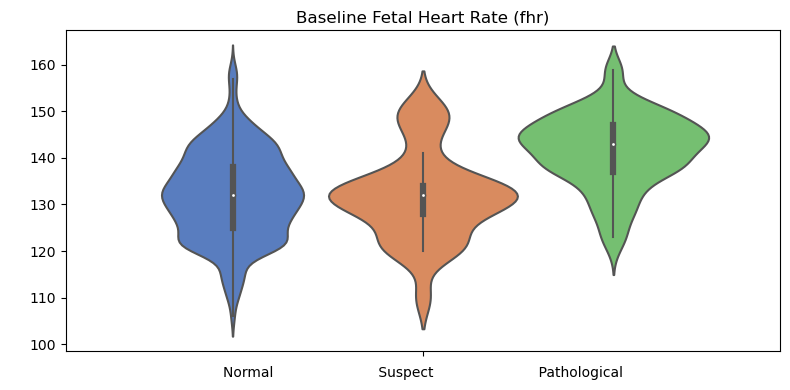

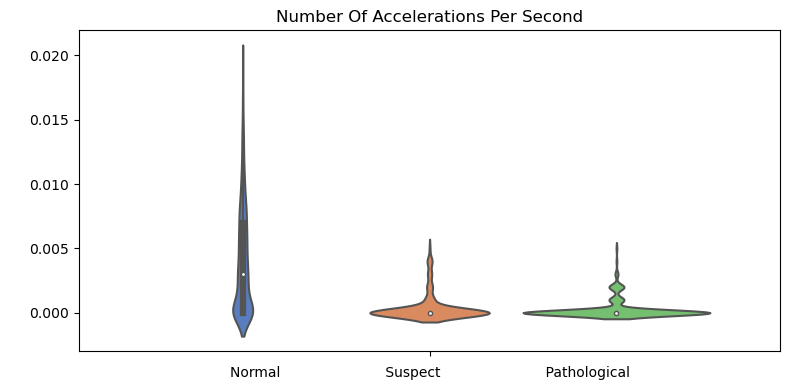

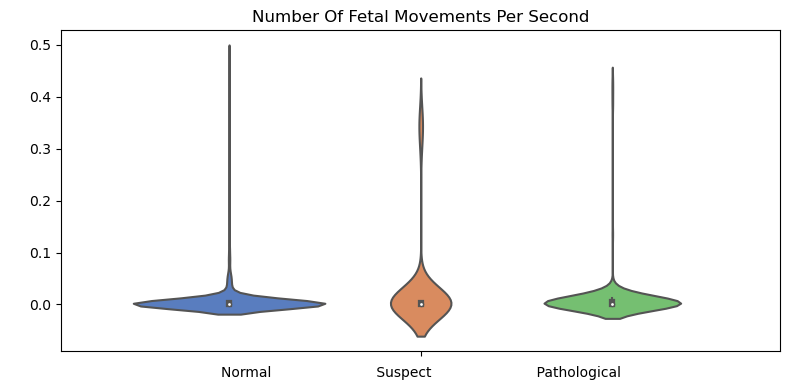

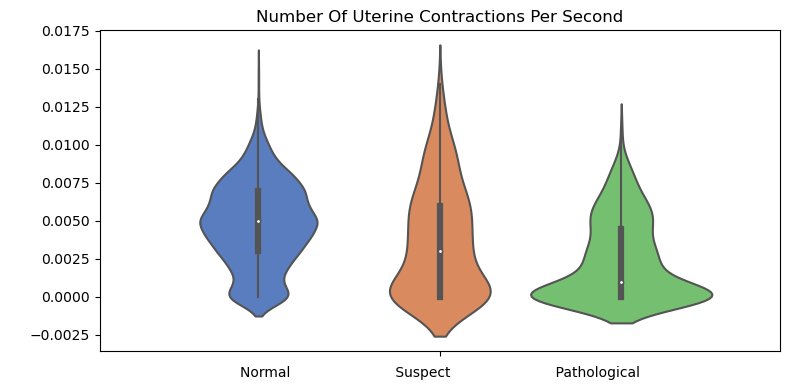

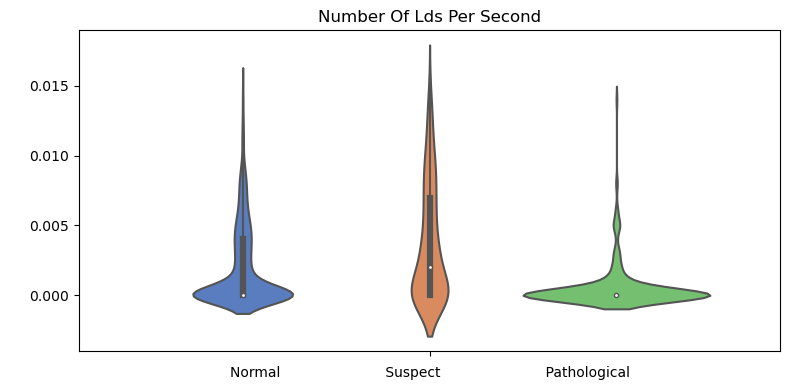

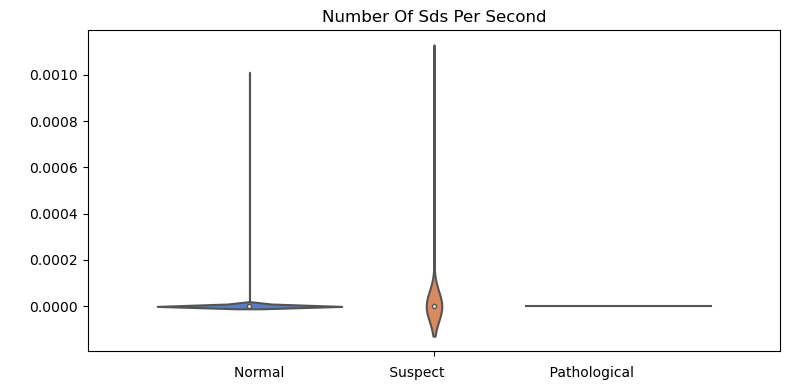

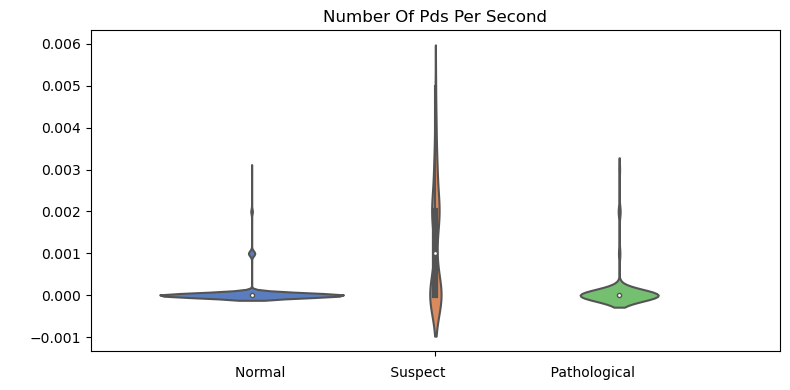

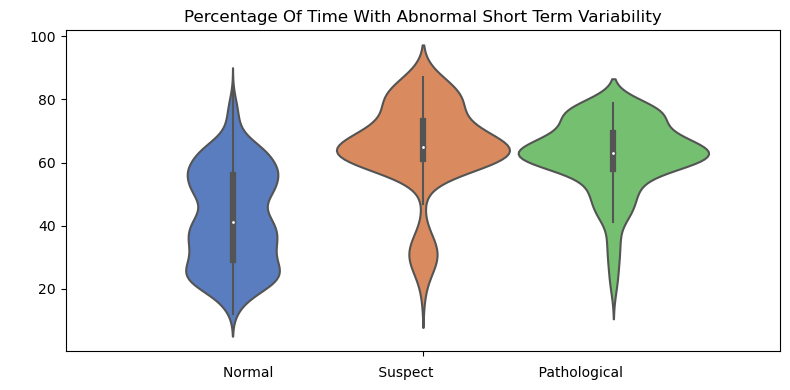

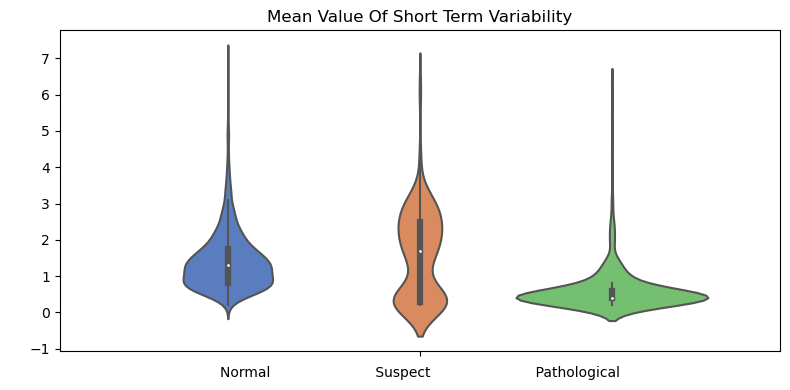

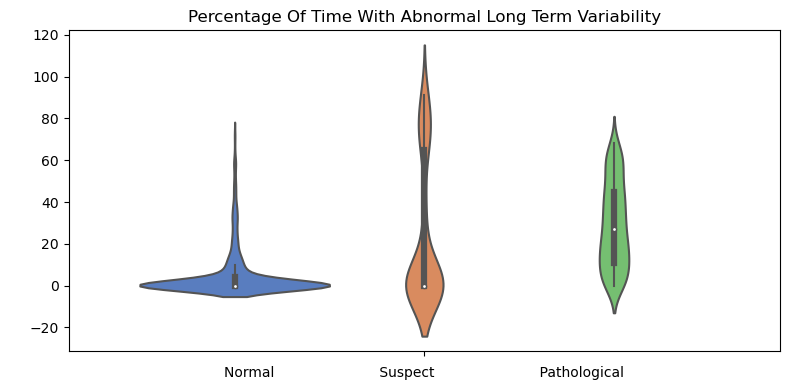

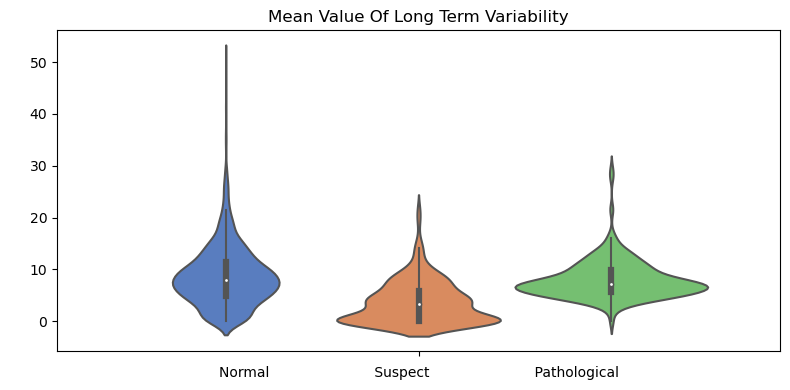

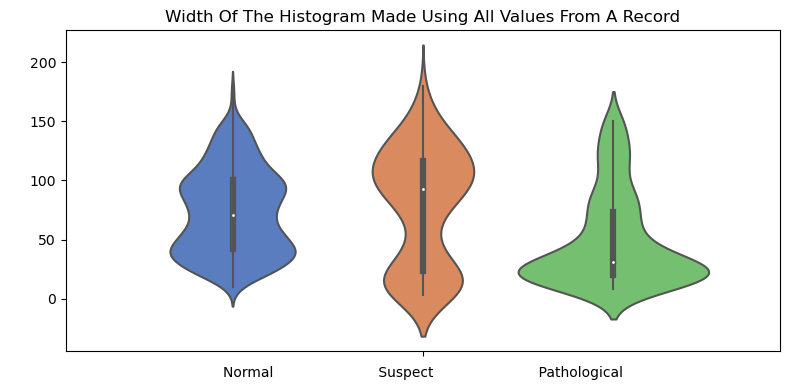

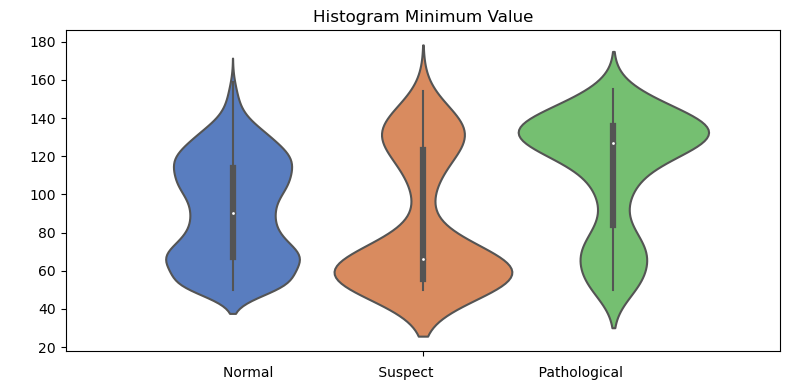

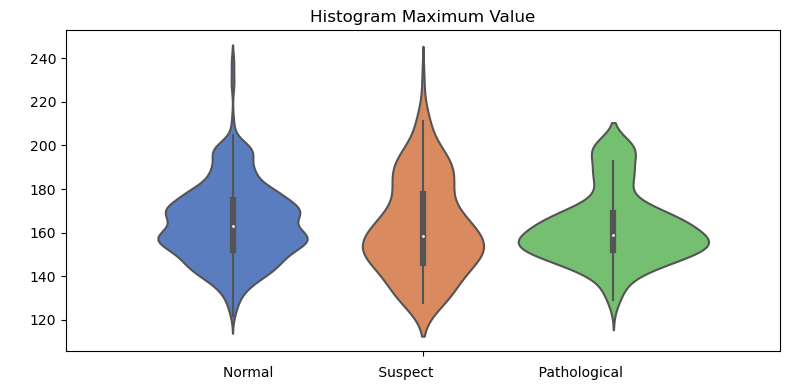

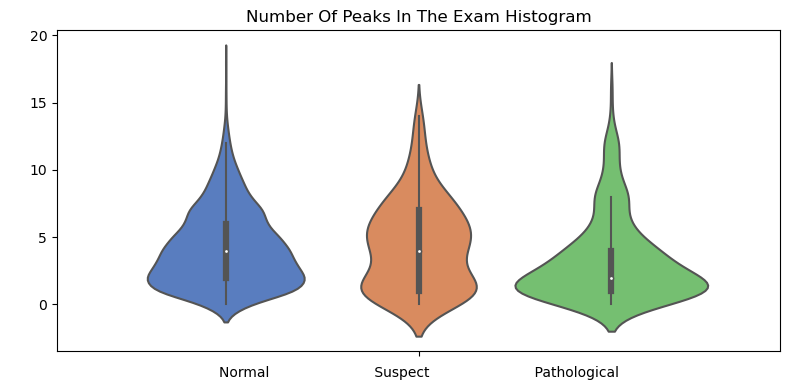

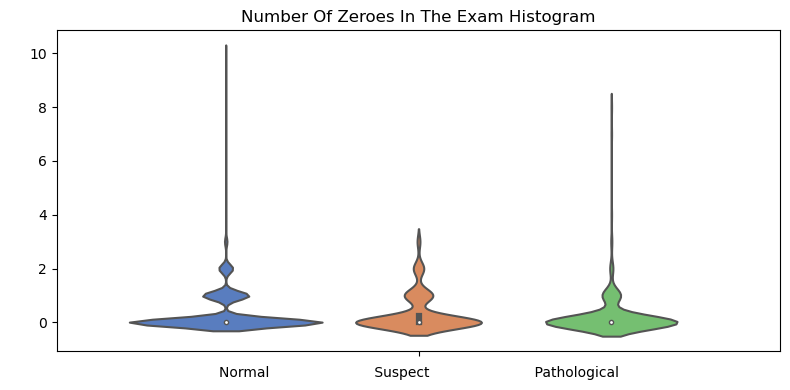

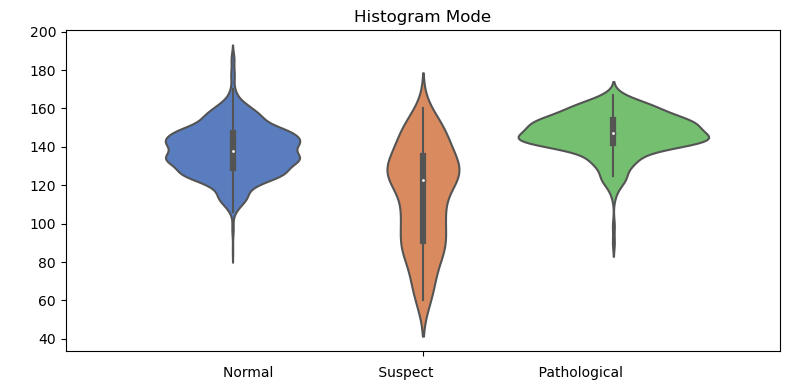

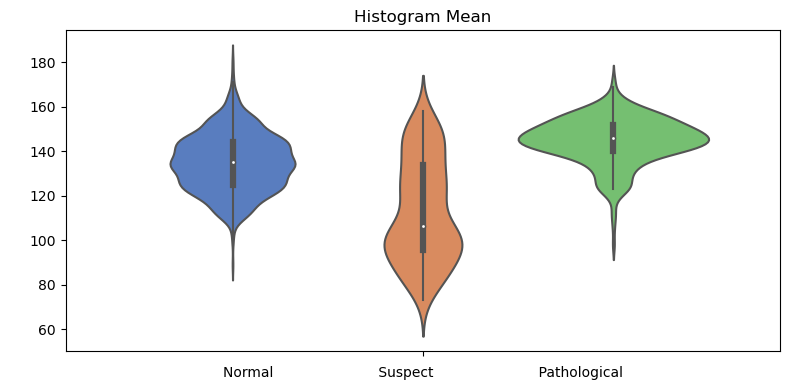

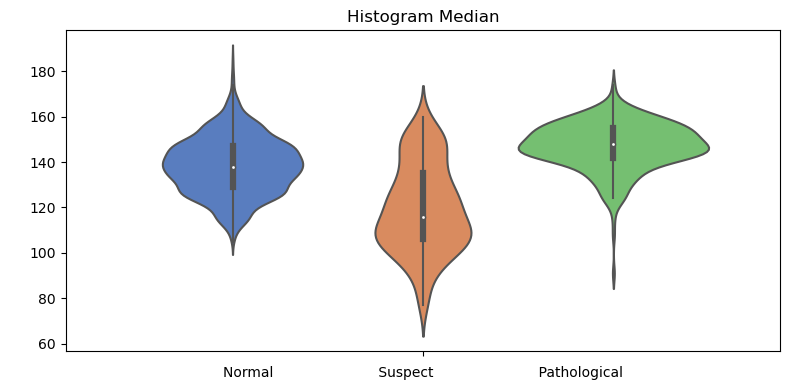

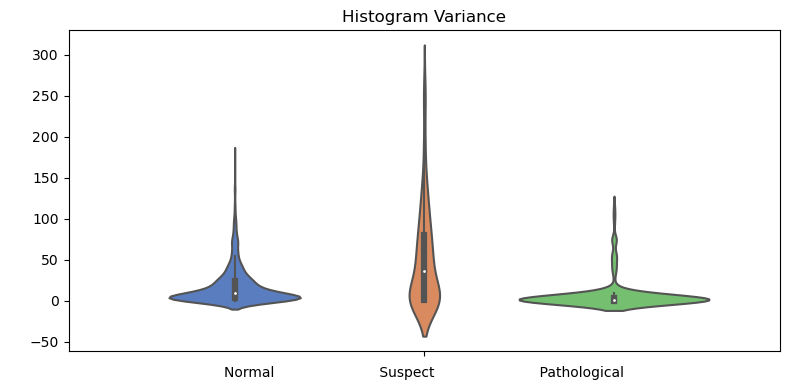

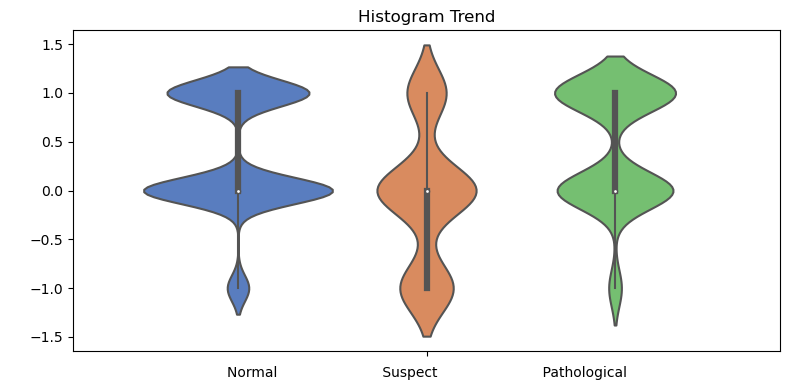

In [61]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Define the mapping for 'fetal_health'
health_mapping = {1: 'Normal', 2: 'Suspect', 3: 'Pathological'}

# Transform the DataFrame from wide to long format
df_long = pd.melt(df, id_vars="fetal_health", var_name="feature", value_name="value")

# Apply the mapping to the 'fetal_health' column
df_long['fetal_health'] = df_long['fetal_health'].map(health_mapping)

df_long = df_long.sort_values(by='fetal_health')

# Feature description mapping 
feature_descriptions = {
    "baseline value": "Baseline Fetal Heart Rate (FHR)",
    "accelerations": "Number of accelerations per second",
    "fetal_movement": "Number of fetal movements per second",
    "uterine_contractions": "Number of uterine contractions per second",
    "light_decelerations": "Number of LDs per second",
    "severe_decelerations": "Number of SDs per second",
    "prolongued_decelerations": "Number of PDs per second",
    "abnormal_short_term_variability": "Percentage of time with abnormal short term variability",
    "mean_value_of_short_term_variability": "Mean value of short term variability",
    "percentage_of_time_with_abnormal_long_term_variability": "Percentage of time with abnormal long term variability",
    "mean_value_of_long_term_variability": "Mean value of long term variability",
    "histogram_width": "Width of the histogram made using all values from a record",
    "histogram_min": "Histogram minimum value",
    "histogram_max": "Histogram maximum value",
    "histogram_number_of_peaks": "Number of peaks in the exam histogram",
    "histogram_number_of_zeroes": "Number of zeroes in the exam histogram",
    "histogram_mode": "Histogram mode",
    "histogram_mean": "Histogram mean",
    "histogram_median": "Histogram median",
    "histogram_variance": "Histogram variance",
    "histogram_tendency": "Histogram trend"
}

# Get unique features to plot
features = df.columns[:-1]  # Excluding the 'fetal_health' column

# Loop through each feature and plot
for feature in features:
    # Filter the long DataFrame for the current feature
    feature_data = df_long[df_long['feature'] == feature]
    
    # Check if filtered DataFrame is empty
    if feature_data.empty:
        print(f"No data to plot for {feature}. Skipping...")
        continue

    plt.figure(figsize=(8, 4))  
    ax = sns.violinplot(x="feature", y="value", hue="fetal_health", data=feature_data, palette="muted")
    description = feature_descriptions.get(feature, feature)  # Default to feature name if no description
    plt.title(' '.join(word.capitalize() for word in description.split(' '))) 
    ax.set_xlabel("Normal                        Suspect                        Pathological")
    ax.set_xticklabels([]) 
    ax.get_legend().remove() 
    ax.set_ylabel(' ')
    plt.tight_layout() 
    plt.show() 


### Correlation Ceofficients Ranked 
#### Measures the correlation between the test and the health of the child 

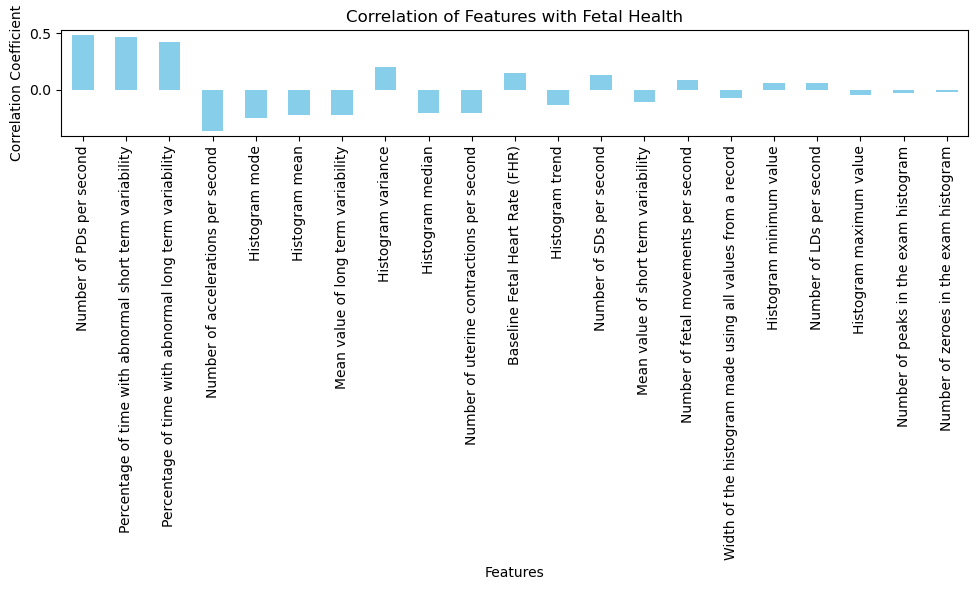

In [67]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate the correlation 
feature_target_corr = df.corr()['fetal_health'].drop('fetal_health')

# Sort the correlations by their absolute values 
sorted_features = feature_target_corr.abs().sort_values(ascending=False).index
sorted_corr = feature_target_corr.loc[sorted_features]

# Plotting
plt.figure(figsize=(10, 6))
sorted_corr.plot(kind='bar', color='skyblue')
plt.title("Correlation of Features with Fetal Health")
plt.xlabel("Features")
plt.ylabel("Correlation Coefficient") 
plt.tight_layout() 
plt.show() 

## Testing and Training Split 

In [69]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler

X = df.iloc[:, :-1] # Features 
y = df.iloc[:, -1] # Target 

scaler = StandardScaler() # Re-scale the Feature data 
X_scaled = scaler.fit_transform(X) 

# Split the dataset training and testing 
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size = 0.25, random_state = 0)

## Logistic Regression Model using SkLearn 

In [70]:
model = LogisticRegression() 
model.fit(X_train, y_train)

# Predict the labels for the testing set 
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)

print(f"Accuracy: {accuracy}")

Accuracy: 0.8966165413533834


## Choosing the correct model: 
#### The relationships between the features are nonlinear and complex, so I will use the Random Forrest model 

Accuracy in predicting health: 0.943609022556391


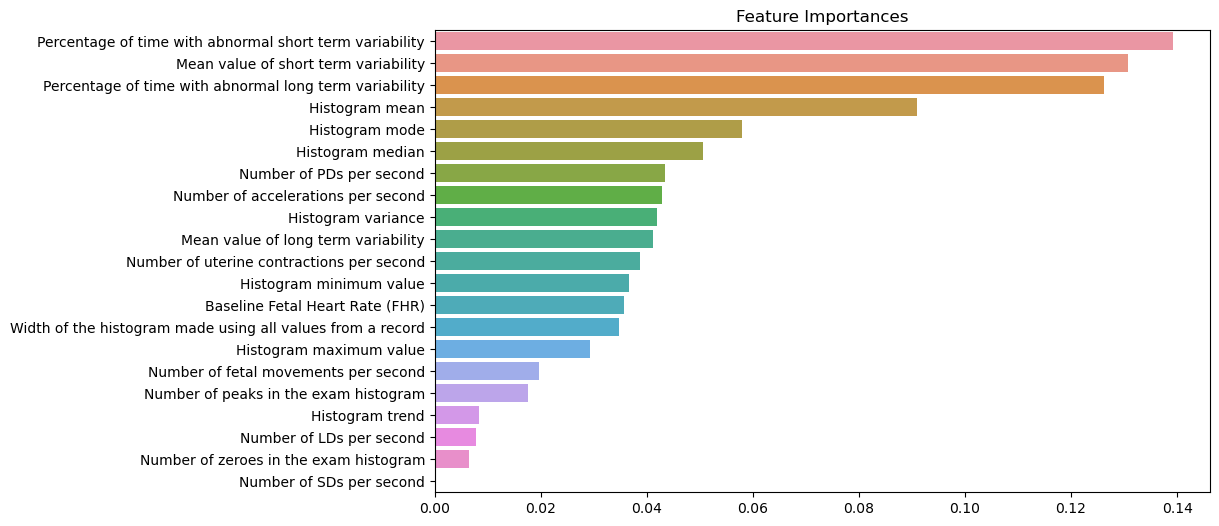

In [81]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Initialize the Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model 
rf_model.fit(X_train, y_train)

# Make predictions 
y_pred = rf_model.predict(X_test)

print("Accuracy in predicting health:", accuracy_score(y_test, y_pred))

# Feature importance 
feature_importances = rf_model.feature_importances_
feature_importance_series = pd.Series(feature_importances, index=X.columns)
sorted_feature_importances = feature_importance_series.sort_values(ascending=False)

# Visualize feature importance 
plt.figure(figsize=(10,6)) 
sns.barplot(x=sorted_feature_importances, y=sorted_feature_importances.index)
plt.title('Feature Importance')
plt.show()